In [2]:
import nibabel as nib
import nilearn
from nilearn import image
import numpy as np
import pandas as pd
import os.path as osp
from glob import glob
from nilearn import plotting

/home/grg/jupyter/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
c1dir = '/media/Projects/ALFA_VBM_processed/c1/'
mddir = '/home/grg/data/ALFA_DWI/'
jacdir = '/home/grg/spm/Jacobians/'
perdir = '/home/grg/spm/ROIvent'
dm = pd.read_excel('/home/grg/spm/designmatrix3.xls')
vv = pd.read_excel('/home/grg/spm/data/Ventricular volumes.xlsx')
fsvol = pd.read_excel('/home/grg/spm/data/aseg FS ALFA.xlsx')
subjects_fp = '/home/grg/spm/data/subjects.json'
import json

allsubjects = json.load(open(subjects_fp))
ages = json.load(open('/home/grg/spm/data/age.json'))
educyears = dict([(str(int(e)), v) for e, v in dm[['Subj_ID', 'Years of Education']].to_dict(orient='split')['data']])
genders = dict([(str(int(e)), v) for e, v in dm[['Subj_ID', 'Gender(0=female)']].to_dict(orient='split')['data']])
tivs = dict([(str(int(str(e)[:5])), v) for e, v in vv[['subject', 'Total Intracranial Volume']].to_dict(orient='split')['data']])

c1fp = '/media/Projects/ALFA_VBM_processed/c1/c1t1_10013.nii'
perfp = osp.join(perdir, '10013_latvent_dilated.nii.gz')

fsvol = fsvol.loc[fsvol['StructName'].isin(['Left-Lateral-Ventricle', 'Right-Lateral-Ventricle', 'Left-Inf-Lat-Vent', 'Right-Inf-Lat-Vent'])][['subject', 'Volume_mm3', 'StructName']]
dm[dm['Subj_ID'] == 10070]

,Subj_ID,MD,MD_corr,MD_pred,Jacobians,FA,L1,RD,Apoe2-3,Apoe2-4,...,agesq44,ventricles_FS,ventricles_JDG,Years of Education,Gender(0=female),qc_fa,qc_md,qc_l1,qc_rd,is_bad
15,10070,/home/grg/spm/MD/10070_MD_MNIspace_s.nii,/home/grg/spm/MD_corr/10070_MD_corr.nii,/home/grg/spm/MD_pred/10070_MD_pred.nii,/home/grg/spm/Jacobians/s6j_t1_10070.nii,/home/grg/spm/FA/10070_FA_MNIspace_s.nii,/home/grg/spm/L1/10070_L1_MNIspace_s.nii,/home/grg/spm/RD/10070_RD_MNIspace_s.nii,1,0,...,0.0,4.520876,4.066362,10,0,4,4,4,4,0


In [18]:
data = []
subjects = allsubjects #[0:100]
groups = ['Apoe2-2', 'Apoe2-3', 'Apoe2-4', 'Apoe3-3', 'Apoe3-4', 'Apoe4-4']
agegroups = ['Apoe2-3','Apoe2-4','Apoe3-3','Apoe3-4','Apoe4-4','age23',
             'age24','age33','age34','age44','agesq23','agesq24','agesq33','agesq34','agesq44']

for j, s in enumerate(subjects):
    print j, s 
    #try:
    mdfp = glob(osp.join(mddir, '%s*'%s, 'DWI', '%s*_MD_t1space.nii.gz'%s))[0]
    jacfp = glob(osp.join(jacdir, '*%s*nii'%s))[0]
    perfp = glob(osp.join(perdir, '%s*.nii.gz'%s))[0]
    md = np.array(nib.load(mdfp).dataobj, copy=True)
    peri = np.array(nib.load(perfp).dataobj, copy=True)
    mdl = np.mean(md[peri==1])
    mdr = np.mean(md[peri==2])
    vvol = dm[dm['Subj_ID'] == s]['ventricles_FS'].tolist()[0]
    age = ages[str(s)]
    agesq = age * age
    tiv = tivs[str(s)]
    sex = genders[str(s)]
    ey = educyears[str(s)]
    #for group, g in enumerate(groups):
    #    if s in dm[dm[g] == 1]['Subj_ID'].tolist():
    #        break
    #apo = [dm[dm['Subj_ID'] == s][x].tolist()[0] for x in agegroups]
    data.append([mdl, mdr, vvol, age, agesq, sex, ey]) #, tiv, group])
    #data[-1].extend(apo)
    #except:
    #    print 'skipping', s

0 10070
1 10102
2 10108
3 10235
4 10365
5 10419
6 10463
7 10530
8 10551
9 10563
10 10576
11 10630
12 10668
13 10692
14 10693
15 10703
16 10725
17 10737
18 10756
19 10809
20 11045
21 11047
22 11048
23 11133
24 11180
25 11225
26 11262
27 11305
28 11351
29 11360
30 11387
31 11407
32 11414
33 11416
34 11550
35 11610
36 11614
37 11638
38 11658
39 11691


IndexError: list index out of range

In [19]:
columns = ['mdl', 'mdr', 'vvol', 'age', 'agesq', 'gender', 'educyears']
#columns.extend([e.replace('-','') for e in agegroups])
data

[[nan, 0.0011878841, 4.5208758718505049, 18548, 344028304, 0, 10],
 [nan, 0.001244281, 16.507218636070277, 23400, 547560000, 1, 18],
 [nan, 0.0011122163, 10.421615504084253, 21434, 459416356, 0, 15],
 [nan, 0.0011755184, 7.5642007937396167, 22370, 500416900, 0, 8],
 [nan, 0.0011601257, 7.7704774303601152, 17795, 316662025, 0, 12],
 [nan, 0.0011398428, 3.484048540407541, 18593, 345699649, 0, 8],
 [nan, 0.0011420994, 7.4018040935183169, 21335, 455182225, 0, 18],
 [nan, 0.0011118628, 7.5218160926679287, 20613, 424895769, 0, 15],
 [nan, 0.0011736506, 17.226243157568582, 21322, 454627684, 1, 12],
 [nan, 0.0011772668, 6.4445513092762621, 18568, 344770624, 0, 12],
 [nan, 0.0012284343, 12.612239376363361, 17246, 297424516, 0, 18],
 [nan, 0.0011213743, 5.3789359114244499, 19505, 380445025, 0, 12],
 [nan, 0.0012068965, 11.353391521719567, 21156, 447576336, 1, 18],
 [nan, 0.0012838787, 29.332879028473339, 23593, 556629649, 0, 15],
 [nan, 0.0012959318, 17.758220629463903, 24142, 582836164, 0, 15],

In [440]:
print apo
df = pd.DataFrame(data, 
                  columns=columns)
df

[0, 0, 0, 0, 1, 0.0, 0.0, 0.0, 0.0, 63.646817248459961, 0.0, 0.0, 0.0, 0.0, 4050.9173458588602]


,gml,gmr,mdl,mdr,md_ofcl,md_ofcr,jacl,jacr,vl,vr,age,agesq,gender,educyears,tiv,apoe
0,3963.164551,4113.191406,0.000986,0.001015,0.001531,0.001611,1.102849,1.175650,3216.4,2375.7,50.781656,2578.776627,0,10,1266.989,1
1,4272.754395,4354.435547,0.001211,0.001277,0.001477,0.001781,0.962475,0.973429,13679.9,12859.2,64.065708,4104.414995,1,18,1633.134,1
2,4593.183105,4359.208008,0.001049,0.001097,0.001422,0.001536,0.989340,0.914207,8871.1,5986.2,58.683094,3443.705495,0,15,1473.831,1
3,4177.236328,4267.051758,0.001060,0.001042,0.001691,0.001761,1.045694,1.056951,6301.4,3957.7,61.245722,3751.038477,0,8,1393.908,1
4,4558.288086,4454.539062,0.001030,0.001076,0.001615,0.001723,1.057800,0.971311,5504.9,5765.6,48.720055,2373.643736,0,12,1510.126,1
5,4755.672852,4852.111328,0.000946,0.000985,0.001744,0.001843,1.051403,1.015576,2670.3,2158.7,50.904860,2591.304740,0,8,1452.563,1
6,4457.572266,4652.879883,0.001069,0.001036,0.001832,0.001958,1.052247,0.986023,6105.2,3719.2,58.412047,3411.967181,0,18,1493.825,1
7,4004.250000,4308.104492,0.001020,0.001045,0.001445,0.001827,1.062169,1.040964,5331.3,4213.4,56.435318,3184.945149,0,15,1288.040,1
8,4510.816895,4317.996582,0.001206,0.001177,0.001223,0.001329,1.019799,0.945167,13490.0,12191.5,58.376454,3407.810438,1,12,1510.428,1
9,4834.943848,4572.562500,0.001020,0.001079,0.001339,0.001301,1.060631,0.965717,4245.2,5230.6,50.836413,2584.340929,0,12,1495.139,1


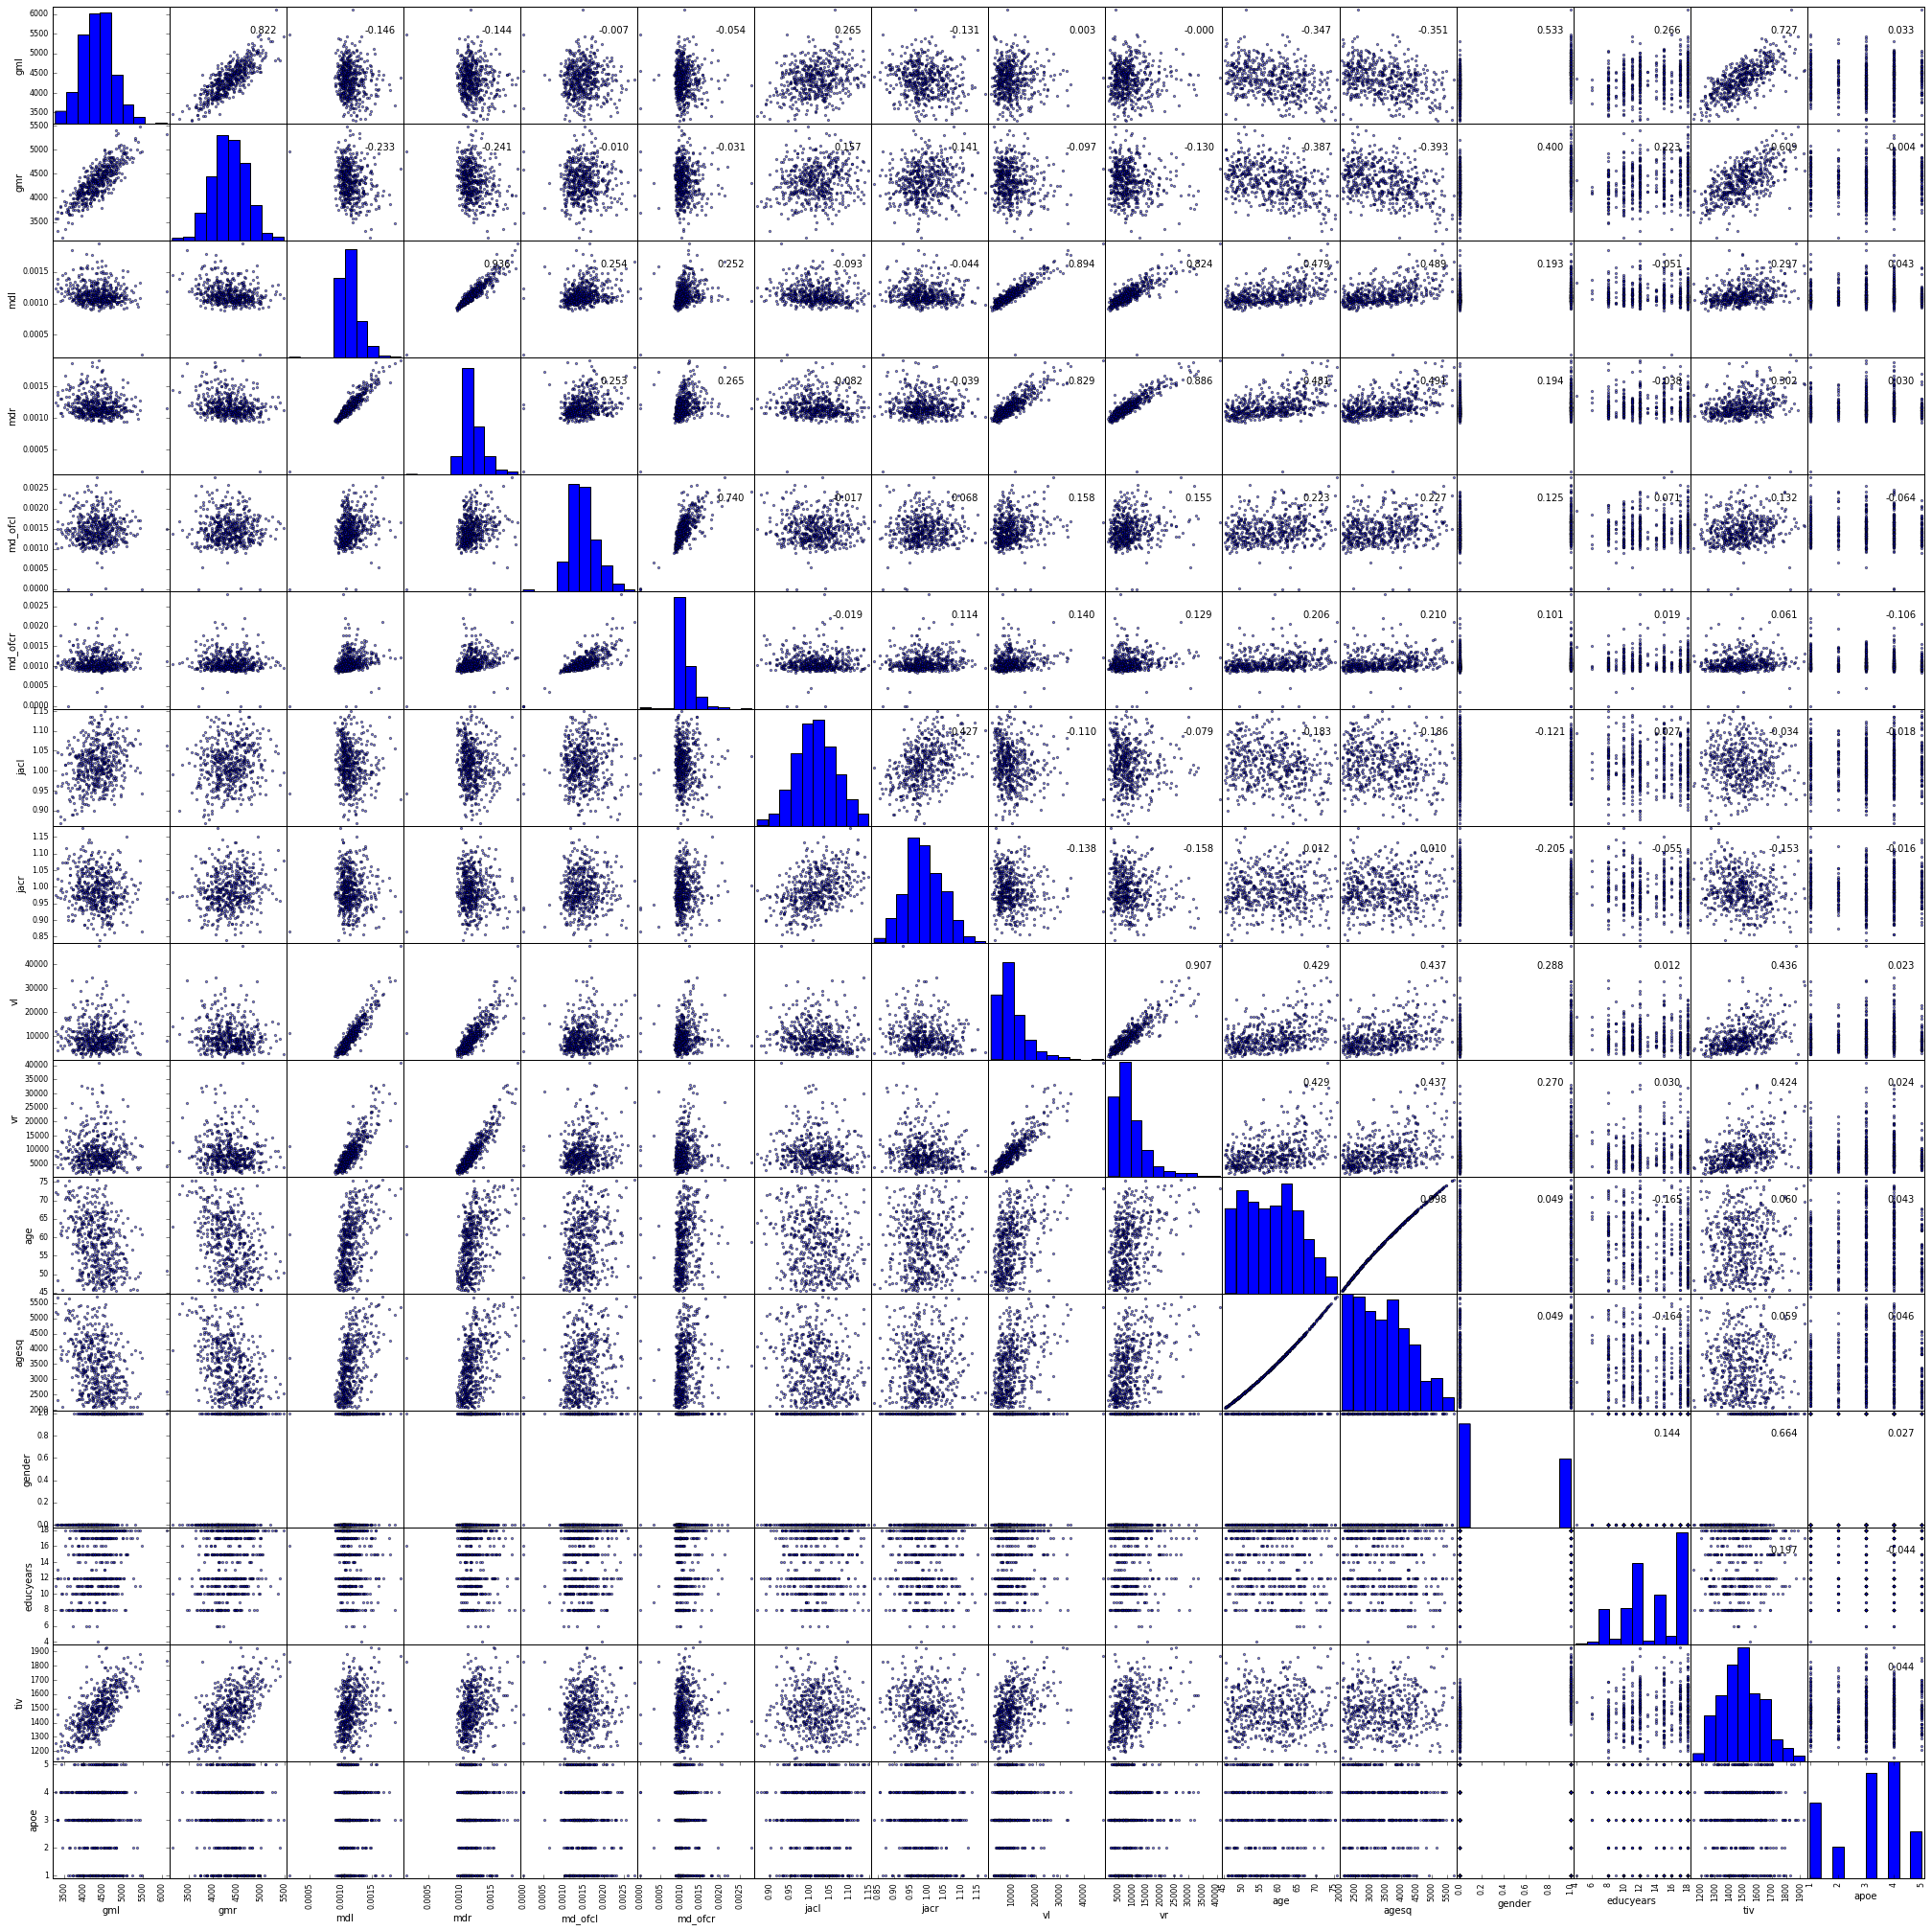

In [416]:
from pandas.tools.plotting import scatter_matrix
%matplotlib inline
import matplotlib.pyplot as plt
axes = scatter_matrix(df, figsize=(35,35))

corr = df.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()


In [16]:
from scipy import stats
import patsy
import statsmodels.api as sm
from statsmodels.formula.api import ols
print columns
f= 'md_ofcl ~ C(apoe) + age:C(apoe) + agesq:C(apoe) + C(gender) + educyears'
lm = ols( f, #Apoe23 + Apoe24 + Apoe33 + Apoe34 + Apoe44 + age23 + age24 + age33 + age34 + age44 + \
         #agesq23 + agesq24 + agesq33 + agesq34 + agesq44 + gender + educyears',
                    data=df).fit()
y,X = patsy.dmatrices(f, df, return_type='dataframe')
table = sm.stats.anova_lm(lm)
r = np.zeros_like(lm.params)
r[1] = 3
r[2]= -2
r[3] = 3
r[4] = -2
r[5] = -2
print lm.params
hypothese = 'C(apoe)[T.5] - (C(apoe)[T.4] + C(apoe)[T.3] + C(apoe)[T.2])'
lm.t_test(hypothese)


['mdl', 'mdr', 'vvol', 'age', 'agesq', 'gender', 'educyears']


NameError: name 'df' is not defined

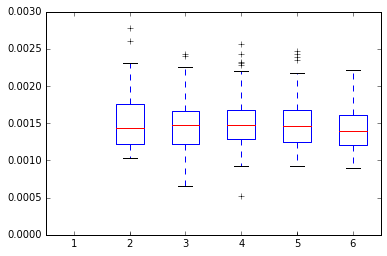

In [403]:
box = [df[df['apoe'] == x]['md_ofcl'].tolist() for x in xrange(6)]
plt.boxplot(box)
plt.show(box)

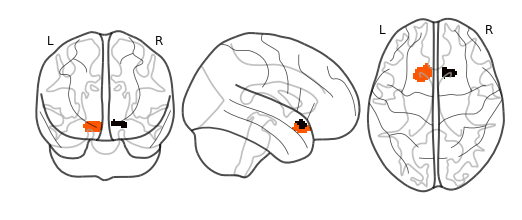

In [391]:
from nistats.thresholding import map_threshold
im = np.array(nib.load('/tmp/ofc_mask2.nii.gz').dataobj, copy=True)
thresholded_map1, threshold1 = map_threshold('/tmp/output_FSvent/MD/analysis/estimatecontrasts/spmT_0006.nii', threshold=0.001, cluster_threshold=50)
im2 = np.array(thresholded_map1.dataobj, copy=True)
im[im2==0] =0 
from nilearn import plotting
plotting.plot_glass_brain(image.new_img_like('/tmp/ofc_mask.nii.gz', im))
image.new_img_like('/tmp/ofc_mask.nii.gz', im).to_filename('/tmp/ofc_mask2_shrinked.nii.gz')

# Generating a periventricular mask

In [19]:
from skimage import morphology as morpho
from skimage.morphology import ball 
import numpy as np
import nibabel as nib
from nilearn import image
from nilearn import plotting
import os.path as osp
%matplotlib inline
%run /home/grg/git/alfa/nilearn-helper.py

In [52]:
vent_fp = '/home/grg/data/ALFA_DWI/10013/T1/10013_latvent.nii'
#t1_fp = '/home/grg/data/ALFA_DWI/10013/T1/10013_mabonlm_nobias.nii'
a1 = np.array(nib.load(vent_fp).dataobj)
a2 = morpho.dilation(a1, ball(6))
mit = a2.shape[0] /2
print mit
a2[a2<1] = 0
a2[mit:,:,:][a2[mit:,:,:] > 0.5] = 2
a2[a1 != 0] = 0
image.new_img_like(vent_fp, a2).to_filename('/tmp/test.nii.gz')


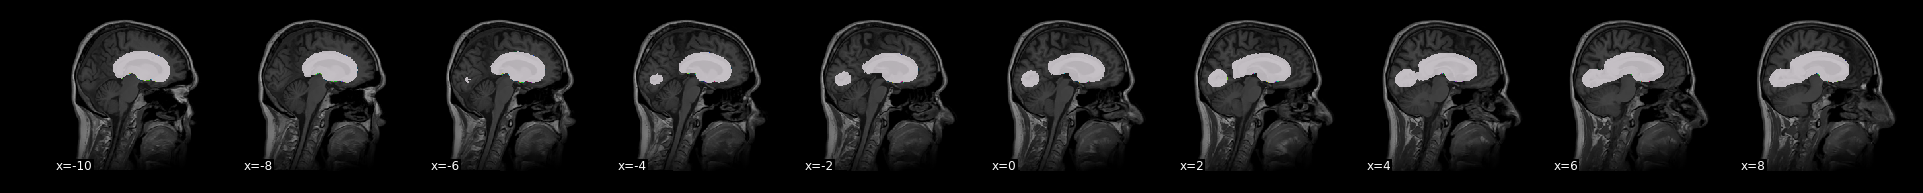

In [30]:
img = plotting.plot_roi(image.new_img_like(vent_fp, a), bg_img=t1_fp, display_mode='x', cut_coords=range(-10,10,2))

#dd_overlay(image.new_img_like(vent_fp, a))

87
